<a href="https://colab.research.google.com/github/amelianrrzqaa/Tugas-Implementasi-Logistic-Regression/blob/main/121_Amelia_Nur_Rizqa_Tugas_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TUGAS IMPLEMENTASI LOGISTIC REGRESSION**#

**Nama : Amelia Nur Rizqa**

**NIM : 2109116121**

**Kelas : SI C 2021**

#Teori

Sebelum masuk ke Logistic Regression, alangkah baiknya mengetahui Linear Regression terlebih dahulu.



**Logistic Regression** adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

**Tipe-tipe Logistic Regression**
1. **Binary Logistic Regression** : Adalah Logistic Regression yang hanya memiliki 2 output saja (mengklasifikasi kedalam 2 kelas berbeda). Contoh: Positif-Negatif, Obesitas-Tidak Obesitas.
2. **Multinomial Logistic Regression** : Adalah Logistic Regression yang memiliki 2 output atau lebih (mengklasifikasi kedalam 2 kelas berbeda). Contohnya kelas Sentiment Analysis kalimat positif, negatif, dan netral.
3. **Ordinal Logistic Regression** : Adalah Logistic Regression yang memiliki 2 output atau lebih dengan memperhatikan urutan. (mengklasifikasi kedalam 2 kelas berbeda dengan memperhatikan urutan). Contohnya adalah membagi kelas mahasiswa dalam range Index Prestasi Kumulatif 1.xx, 2.xx, 3.xx, dan 4.00.

#Inisialisasi Library

Inisialisasi Library yang akan digunakan untuk mengolah dataset, training, dan validasi

In [ ]:
#inisialisasi library
import warnings 
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

#Persiapan Data

Buka dataset dengan Dataframe Pandas, dan cek seluruh atribut yang ada

Sumber dataset : https://www.kaggle.com/datasets/shreyshi/adultcsv

In [ ]:
#siapkan dataframe untuk mengambil attribut
url = "https://raw.githubusercontent.com/amelianrrzqaa/Tugas-Implementasi-Logistic-Regression/main/adult.csv"

In [ ]:
# Untuk mengkoneksikan suatu data dari dalam file csv
df = pd.read_csv(url)

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#Tentang Dataset

**age**: Menjelaskan usia individu. Kontinu.

**workclasss**: Swasta, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Tanpa gaji, Tidak pernah bekerja.
**fnlwgt**: Berkelanjutan.

**education**: Sarjana, Beberapa perguruan tinggi, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Jumlah tahun yang dihabiskan dalam pendidikan. Kontinu.

**marital-status**: Menikah-civ-pasangan, Bercerai, Belum pernah menikah, Terpisah, Janda, Menikah-pasangan-absen, Menikah-AF-pasangan.

**occupation**: Dukungan teknis, Perbaikan kerajinan, Layanan lain, Penjualan, Eksekutif-manajerial, Prof-spesialisasi, Pembersih-penangan, Mesin-op-inspeksi, Adm-klerikal, Pertanian-memancing, Transportasi-pindah, Priv-house- serv, Pelindung-serv, Angkatan Bersenjata.

**relationship**: Istri, Anak sendiri, Suami, Tidak sekeluarga, Kerabat lain, Belum menikah.
Race: Putih, Asia-Pac-Islander, Amer-India-Eskimo, Lainnya, Hitam.

**sex** : Wanita, Pria.

**capital-gain**: Berkelanjutan.

**capital-loss**: Berkelanjutan.

**hours-per-week**: Berkelanjutan.

**native-country**: Amerika Serikat, Kamboja, Inggris, Puerto-Riko, Kanada, Jerman, AS Terluar (Guam-USVI-dll), India, Jepang, Yunani, Selatan, Cina, Kuba, Iran, Honduras, Filipina, Italia , Polandia, Jamaika, Vietnam, Meksiko, Portugal, Irlandia, Prancis, Republik Dominika, Laos, Ekuador, Taiwan, Haiti, Kolumbia, Hongaria, Guatemala, Nikaragua, Skotlandia, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong , Belanda-Belanda.

**salary**: >50K,<=50K

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observasi:
1. Dataset sama sekali tidak mengandung nilai nol!
2. Umur, Berat Akhir, Nomor Pendidikan, Perolehan Modal, Kehilangan Modal, dan Jam Per Minggu adalah kolom bilangan bulat.
3. Tidak ada Tipe Data Float dalam kumpulan data.
4. Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country dan Income adalah tipe data objek.
5. Meskipun kumpulan data tidak mengandung nilai nol, pengamatan lebih dekat (lihat sel 3) memberi tahu kita bahwa ada banyak '?' nilai dalam dataset kami. Kita harus mengganti nilai-nilai itu!

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Observasi:
1. Usia minimum dan maksimum orang dalam kumpulan data masing-masing adalah 19 dan 90 tahun, sedangkan usia rata-rata adalah 37 tahun.
2. Lama pendidikan minimum dan maksimum masing-masing adalah 1 dan 16 tahun, sedangkan rata-rata tingkat pendidikan adalah 10 tahun.
3. Sementara capital gain minimum dan rata-rata adalah 0, maksimum adalah 99999. Ini terlihat aneh, mungkin ada kesalahan dalam pengumpulan data.
4. Jumlah jam yang dihabiskan per minggu bervariasi antara 1 hingga 99 dan rata-rata 40 jam.


In [ ]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observasi:
1. Kita dapat melihat bahwa kolom workclass, occupation, dan native.country berisi nilai null. Kita harus mencari cara untuk menghadapi mereka!
2. Ada banyak cara untuk menghitung nilai yang hilang, tetapi sekarang, demi kesederhanaan kita akan menghitungnya menggunakan mode!

In [ ]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Analisis Data Eksplorasi
Sebelum memulai, mari kita pahami sedikit tentang data kita.

Ekstraksi dilakukan oleh Barry Becker dari database Sensus 1994. Serangkaian catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Tugas prediksi adalah untuk menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

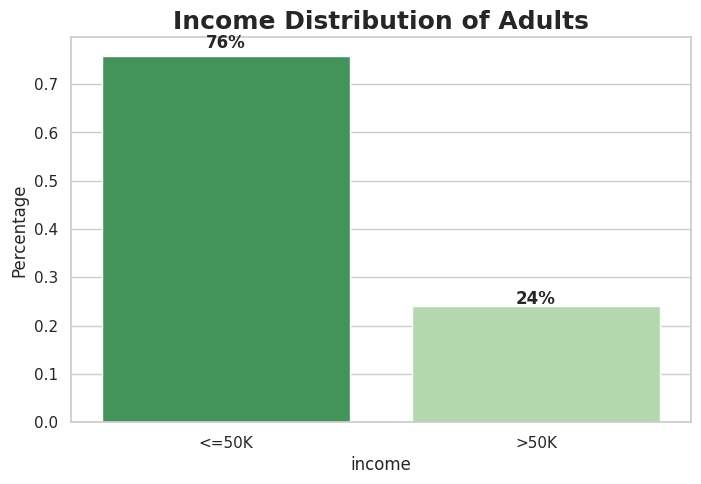

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Observasi:
Di Bagian EDA, saya ingin memulai dengan menganalisis variabel target kita terlebih dahulu. Kami telah menemukan pengamatan yang sangat jelas!

1. Jumlah orang yang berpenghasilan lebih dari 50K dolar setahun adalah sepertiga dari orang yang berpenghasilan kurang dari itu.
2. Kita juga harus ingat bahwa data ini dikumpulkan pada tahun 1996, jadi 50K dolar pada waktu itu, mungkin tidak sama di zaman sekarang!

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

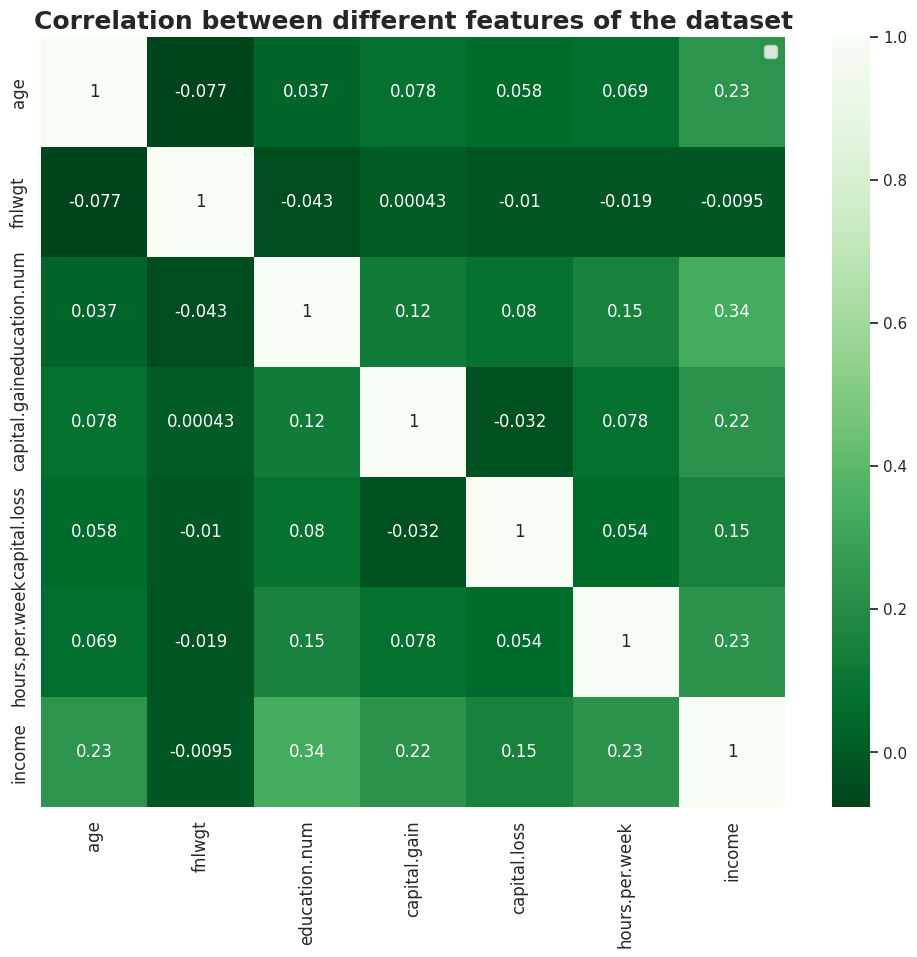

In [ ]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

Observasi:

Di sini, kami telah mencoba memplot peta korelasi untuk melihat apakah fitur independen terkait dengan fitur dependen atau tidak.

1. Kami melihat bahwa sebagian besar fitur berkorelasi positif dengan Variabel Pendapatan.
2. Hal penting yang perlu diperhatikan di sini adalah, kami belum membahas tipe data objek dalam grafik korelasi ini.

In [ ]:
#Mendistribusikan kolom age dalam 3 bagian penting dan memplotnya sesuai dengan fitur keluaran (income)

#Menggabungkan nilai pendidikan yang lebih rendah bersama-sama

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [ ]:
df.drop('age_group', inplace = True, axis = 1)

#Model Implementasi

1. Di sini, saya akan menggunakan Model Regresi Logistik dan mencoba membangunnya dari awal.

2. Saya kemudian akan melakukan hal yang sama dengan menggunakan paket Scikit-learn dan melihat apakah ada perbedaan besar dalam keakuratannya!

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

Tentang Regresi Logistik:

Sebelum kita mulai membuat kode, mari kita pahami atau setidaknya mencoba memahami hal-hal yang terjadi di back-end Regresi Logistik Scikit Learn. Tujuan dari bagian ini adalah untuk menjelaskan matematika di balik Regresi Logistik dan untuk mencapai tujuan pertama dari kernel ini.

Untuk dapat melakukan ini kita harus menjawab pertanyaan, bagaimana cara kerja Regresi Logistik? Secara teori, regresi Logistik mengambil masukan dan mengembalikan keluaran probabilitas, nilai antara 0 dan 1. Bagaimana Regresi Logistik melakukannya? Dengan bantuan fungsi yang disebut fungsi logistik atau yang paling sering dikenal dengan sigmoid. Fungsi sigmoid ini bertanggung jawab untuk memprediksi atau mengklasifikasikan input yang diberikan.

Tentang fungsi Sigmoid:

1. Ini adalah fungsi matematika yang memiliki karakteristik yang dapat mengambil nilai riil apa pun dan memetakannya antara 0 hingga 1 berbentuk huruf “S”.
2. Fungsi sigmoid disebut juga fungsi logistik.
3. Fungsi sigmoid g(z) mengambil fitur dan bobot z sebagai input dan mengembalikan hasil antara 0 dan 1.
4. Keluaran dari fungsi sigmoid adalah prediksi aktual ŷ.
5. Jadi, jika nilai z menuju tak terhingga positif maka nilai prediksi y akan menjadi 1 dan jika menuju negatif tak terhingga maka nilai prediksi y akan menjadi 0.
6. Dan jika hasil dari fungsi sigmoid lebih dari 0,5 maka label tersebut kita klasifikasikan sebagai kelas 1 atau kelas positif dan jika kurang dari 0,5 maka kita dapat mengklasifikasikannya ke kelas negatif atau label sebagai kelas 0.

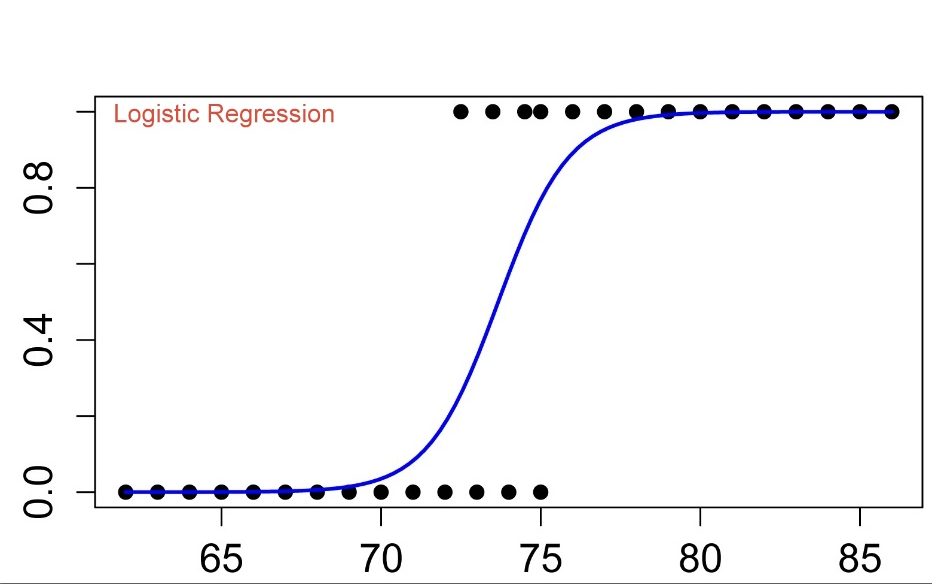

In [ ]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

Tentang Fungsi Kerugian:

1. Bobot adalah bagian penting dari Regresi Logistik dan algoritme Pembelajaran 2. Mesin lainnya dan kami ingin menemukan nilai terbaik untuknya. Untuk memulai, kami memilih nilai acak dan kami membutuhkan cara untuk mengukur seberapa baik kinerja algoritme menggunakan bobot acak tersebut. Ukuran itu dihitung menggunakan fungsi kerugian.

Fungsi kerugian didefinisikan sebagai:

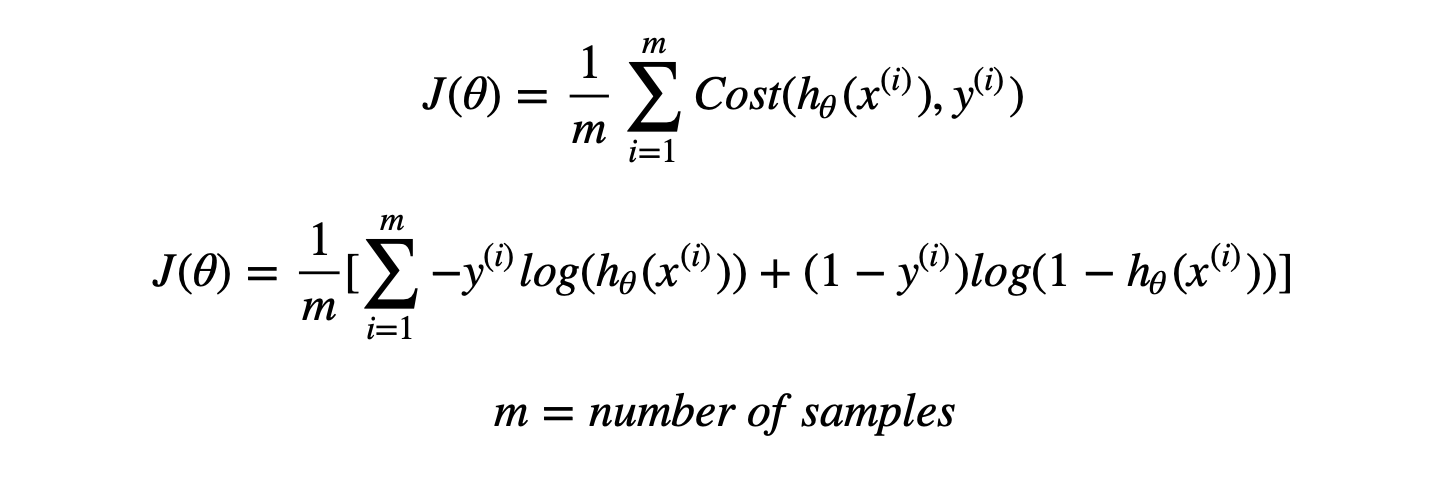

In [ ]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

Tentang Keturunan Gradien:

Turunan gradien adalah algoritma pengoptimalan berulang, yang menemukan minimum dari fungsi yang dapat dibedakan. Dalam proses ini, kami mencoba nilai yang berbeda dan memperbaruinya untuk mencapai nilai optimal, meminimalkan biaya.

1. Mari pikirkan langkah pertama, semuanya dimulai dengan menginisialisasi bobot dan bias. Oleh karena itu biaya tergantung dengan mereka.
2. Untuk mengurangi biaya, kita perlu memperbarui bobot dan bias.
3. Dengan kata lain, model kita perlu mempelajari bobot parameter dan bias yang meminimalkan fungsi biaya. Teknik ini disebut penurunan gradien.

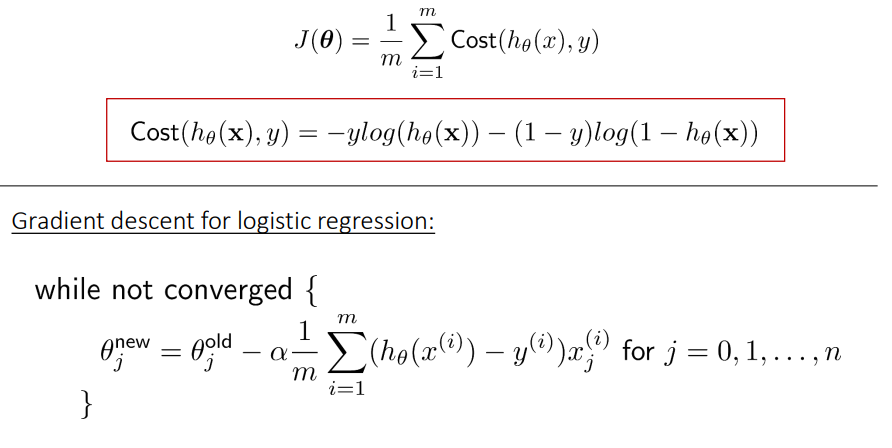

1. Pertama-tama Anda memilih sembarang titik acak dari fungsi.
2. Maka Anda perlu menghitung turunan dari J().
3. Ini akan menunjuk ke arah minimum lokal.
4. Sekarang gandakan gradien yang dihasilkan dengan Learning Rate.
5. Learning Rate tidak memiliki nilai tetap, dan diputuskan berdasarkan masalah.
6. Sekarang, Anda perlu mengurangkan hasil dari untuk mendapatkan .
7. Pembaruan ini harus dilakukan secara bersamaan untuk setiap (i).

Lakukan langkah ini berulang kali hingga Anda mencapai minimum lokal atau global. Dengan mencapai minimum global, Anda telah mencapai kerugian serendah mungkin dalam prediksi Anda.

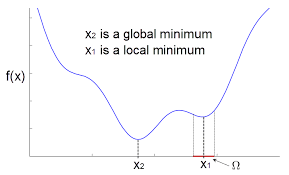

In [ ]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

Estimasi Kemungkinan Maksimum:

- Sederhananya, MLE adalah metode untuk memperkirakan parameter.
- Setiap kali kami menyesuaikan model pembelajaran statistik atau mesin, kami memperkirakan parameter. Regresi linier variabel tunggal memiliki persamaan:

Y = B0 + B1*X

Tujuan kami ketika kami mencocokkan model ini adalah untuk memperkirakan parameter B0 dan B1 mengingat nilai pengamatan kami dari Y dan X. Estimasi Kemungkinan Maksimum adalah cara untuk memperkirakan parameter model, mengingat apa yang kami amati.

MLE mengajukan pertanyaan, "Mengingat data yang kami amati (sampel kami), apa parameter model yang memaksimalkan kemungkinan terjadinya data yang diamati?"

In [ ]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

Gradient Ascent:

- Jadi setelah melihat Fungsi Biaya dan Fungsi Sigmoid, sekarang mari pikirkan sebuah algoritma yang dapat menggabungkan kedua fungsi ini dan memberi kita hasil yang diinginkan.
- Algoritma tersebut adalah algoritma Gradient Ascent.
- Jadi Pendakian Gradien adalah algoritme pengoptimalan berulang untuk menemukan maksima lokal dari fungsi yang dapat dibedakan.
- Algoritme bergerak ke arah gradien yang dihitung pada setiap titik kurva fungsi biaya hingga kriteria pemberhentian terpenuhi.
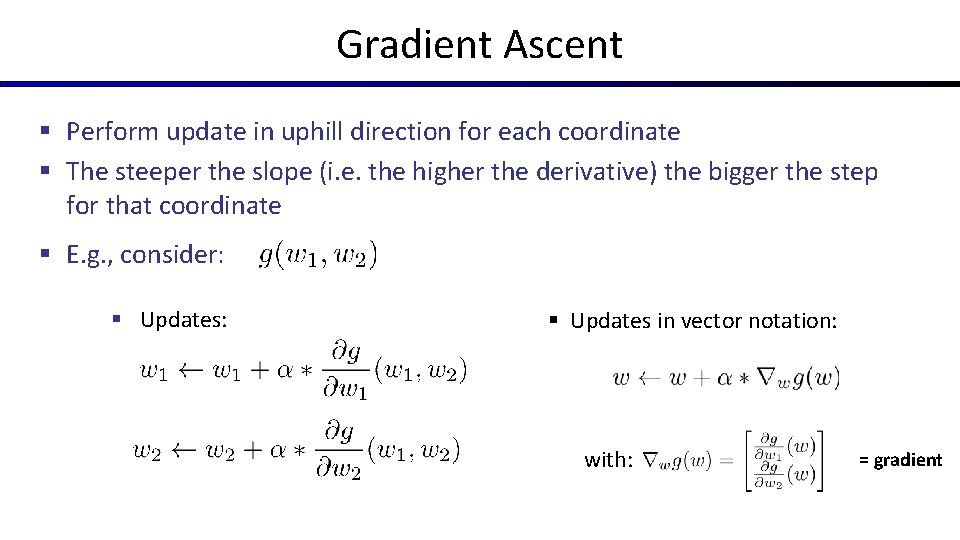

Gagasan di balik Gradient ascent adalah titik gradien 'uphill’.

Jadi jika Anda perlahan-lahan bergerak menuju arah gradien maka Anda akhirnya mencapai maksimum global.

Gradient ascent memiliki analogi di mana kita harus membayangkan diri kita berada di dasar lembah gunung dan dibiarkan terdampar dan mata tertutup, tujuan kita adalah mencapai puncak bukit. Sekarang untuk memaksimalkan kemungkinan log kita, kita perlu menjalankan fungsi gradient ascent pada setiap parameter yaitu.

bobot = bobot + laju_pembelajaran * gradien

In [ ]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [ ]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1)) 
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):263.867027759552 seconds
Learning rate: 0.1
Iteration: 100000


In [ ]:
result = sigmoid(x, theta)

Final Implementation:

In [ ]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


24.080955744602438

In [ ]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using MLE):263.1152558326721seconds
Learning rate: 0.1
Iteration: 100000


In [ ]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


78.94720678111852

Regresi Logistik menggunakan MLE:

Di sini, kami melihat bahwa dalam menerapkan Logistic Regression from Scratch menggunakan Maximum Likelihood Estimation, kami dapat mencapai akurasi sebesar 78,9%. Mari kita coba mengimpor Scikit Learn dan membandingkan model kita dengan Regresi Logistik bawaan dari paket.

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8013102671716654


In [ ]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8028558268079227
2 0.8037770612620913
3 0.8077690772301551
4 0.7951788730231844
5 0.8096115461384923
6 0.7996315062183326
7 0.8027022877322278
8 0.8028558268079227
9 0.8033164440350069
10 0.8037770612620913
11 0.8023952095808383
12 0.8089973898357132
13 0.7996315062183326
14 0.799324428066943
15 0.8002456625211116
16 0.8028558268079227
17 0.8046982957162598
18 0.8082296944572394
19 0.7951788730231844
20 0.8057730692461231
21 0.8085367726086289
22 0.7942576385690158
23 0.7996315062183326
24 0.8005527406725012


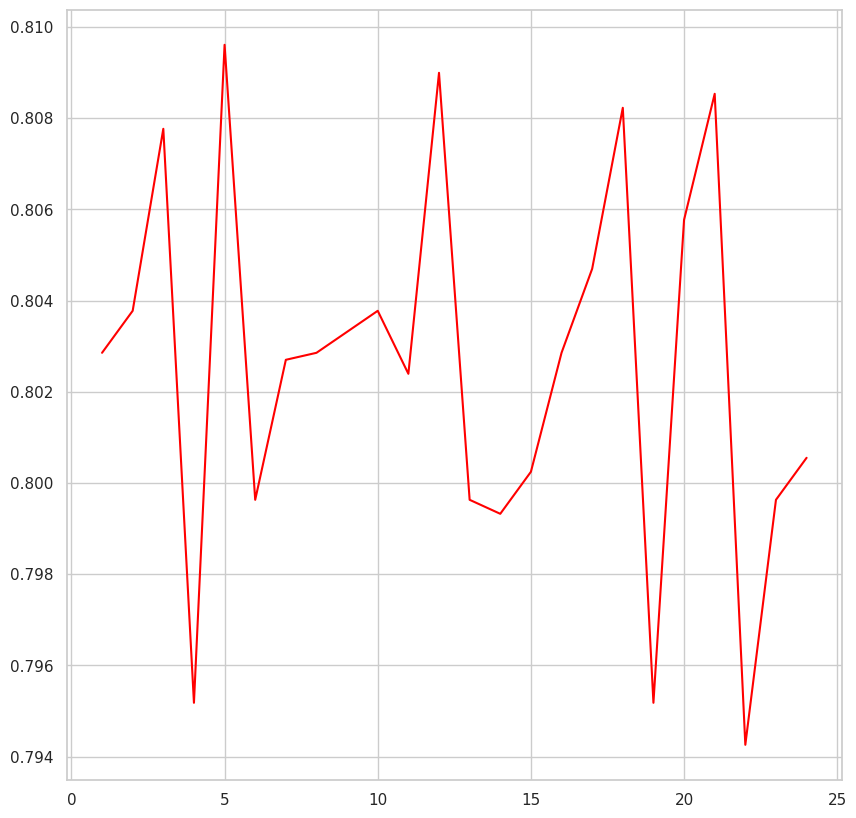

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [ ]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8096115461384923
0.8089973898357132
0.8082296944572394
0.8085367726086289


Kesimpulan Regresi Logistik:

Saya melihat bahwa Regresi Logistik menggunakan Sklearn memberi saya akurasi maksimum 80,9%. Memikirkan hal ini, model yang saya siapkan dari awal tidak seburuk model bawaan!

#Ringkasan dan Kesimpulan

Di kernel ini, kami telah membuat regresi logistik dari awal. Kami telah mempelajari perhitungan yang terjadi di bagian belakang Regresi Logistik. Kami telah mengubah persamaan dan fungsi matematika ini menjadi kode python. Kami telah melatih fungsi regresi logistik kami dalam dua cara: melalui meminimalkan kerugian menggunakan penurunan gradien dan memaksimalkan kemungkinan menggunakan peningkatan gradien. Dataset Penghasilan Orang Dewasa digunakan untuk pelatihan dan juga evaluasi.

Saya masih mencoba mencari tahu bagaimana saya dapat meningkatkan akurasi Regresi Logistik yang Meminimalkan Kerugian. Jika Anda dapat membantu saya dengan itu, saya akan dengan senang hati meningkatkan notebook ini!

Terlepas dari semua ini, fungsi kami bekerja cukup baik menurut saya, (LOL) tidak jauh dari keakuratan sklearn, namun ada metrik lain yang perlu dipertimbangkan dalam membandingkan model ini juga.

Untuk menyelesaikan semuanya, mari kita tinjau tujuan kita dan apakah kita telah mencapainya. Tujuan pertama adalah untuk memahami kumpulan data itu sendiri dan EDA kami membantu kami mendapatkan wawasan yang lebih baik tentang hal yang sama. Kedua, kami ingin memahami teori di balik Regresi Logistik. Tujuan ketiga adalah untuk mengimplementasikan Regresi Logistik tanpa menggunakan pustaka Regresi Logistik bawaan, ya kami telah melakukannya juga, dan itu dilatih, dan dievaluasi.

Implementasi regresi logistik ini mungkin tidak akan pernah digunakan dalam produksi dan kecil kemungkinannya akan mengalahkan modul LogisticRegression milik sklearn, namun tujuan dari kernel ini adalah untuk memahami struktur algoritma yang berbeda, dalam hal ini, Regresi Logistik.